# Homework 0

**Name:** Andrea Gonzalez Cruz

**e-mail:** andrea.gcruz@alumnos.udg.mx

# Modules

In [4]:
# Load modules 
import matplotlib.pyplot as plt # Matplotlib is a library for creating interactive visualization
import numpy as np # Numpy is a mathematical library for Python

# Theory on the Gradient Descent algorithm

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function, taking repeated steps in the opposite direction of the gradient of the function at the current point. 
Formally, if we start at a point X0 and move a positive distance (α) in the direction of the negative gradient, our new and improved X1 will be: 






In [11]:
# Function to be optimized
def f(x):
    return (x**2) * np.cos(x) - x #Function x^2*cos(x)-x
def df(x): 
    return 2*x*np.cos(x) - (x**2) * np.sin(x) - 1 #Derived function 

#Define the Gradient Descent point, learning rate and number of iterations for the function
def gradient_descent(x_point, learning_rate, iterations): 
    points = [x_point]
    for _ in range(iterations):
        gradient = df(x_point)
        x_point = x_point - learning_rate * gradient
        points.append(x_point)
    return points 

In [20]:
#Linspace creates arrays of numbers spaced by intervals
x = np.linspace(-10, 10, 100)
f_x = f(x)

#Initial point for the function
x_ini = -6.3
f_x_ini = f(x_ini) 

In [21]:
# Run gradient descent algorithm
points = gradient_descent(x_ini, learning_rate= 0.1, iterations= 20)

points[-1], f(points[-1]) #Gradient descent steps, points are evaluated in the function

(np.float64(-3.582641517775542), np.float64(-8.024395221763479))

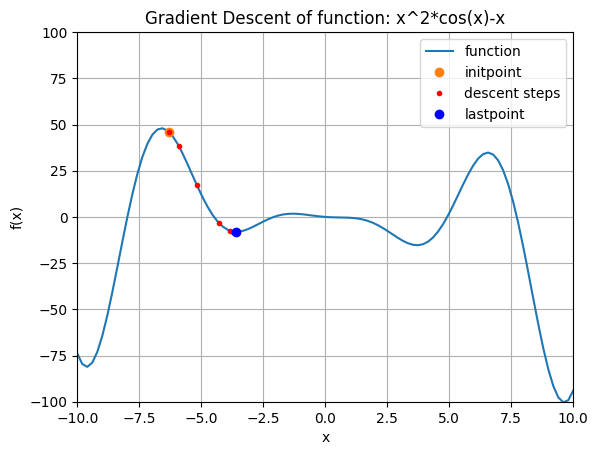

In [18]:
# Plot the results

#2D Graphic of the x^2*cos(x)-x function
plt.plot(x, f_x, label= "function")
plt.plot(x_ini, f_x_ini, 'o', label= "initpoint")
plt.plot(points, [f(x) for x in points], 'ro', markersize = 3, label= 'descent steps')
plt.plot(points[-1], f(points[-1]), 'bo', label="lastpoint")
plt.title("Gradient Descent of function: x^2*cos(x)-x")
plt.xlabel("x")
plt.xlim(-10, 10)
plt.ylim(-100, 100)
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()